# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import os
import cv2
import numpy as np
from imutils import paths
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from keras.layers import Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.utils import to_categorical
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model
from keras import regularizers
from keras.losses import MeanSquaredError
from keras import datasets, layers, models
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import keras
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
import keras.backend as K
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
import os
import joblib
import numpy as np
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
from numpy.random import rand
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from random import randrange
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
import xgboost as xg

In [3]:
import seaborn as sns
sns.set()

import re
import string
from wordcloud import WordCloud
from collections import Counter

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from numpy.random import rand
#from scikitplot.metrics import plot_confusion_matrix, plot_roc

In [5]:
dff = pd.read_csv('/Users/tharun/Desktop/final-year-proj/datasets/final_dataset.csv')

In [6]:
dff = dff.fillna(0)
dff = dff.replace([np.inf, -np.inf], 1e9)

In [7]:
col_to_encode = ' Label'
encoder = LabelEncoder()
dff[col_to_encode] = encoder.fit_transform(dff[col_to_encode])

In [8]:
dff[col_to_encode].unique()

array([ 0,  7, 11,  6,  5,  4,  3,  8, 12, 14, 13,  9,  1, 10,  2])

In [9]:
# Separate the features and target
features = dff.iloc[:, :-1]
target = dff.iloc[:, -1]

In [10]:
target

0          0
1          0
2          0
3          0
4          0
          ..
1530738    0
1530739    0
1530740    0
1530741    0
1530742    0
Name:  Label, Length: 1530743, dtype: int64

In [11]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the data in each column
features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)


In [12]:
features

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.755119,1.333333e-07,0.000005,0.000000,9.302326e-07,0.000000e+00,0.000257,0.002581,0.001010,0.000000,...,0.000005,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.755119,1.166667e-07,0.000005,0.000000,9.302326e-07,0.000000e+00,0.000257,0.002581,0.001010,0.000000,...,0.000005,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.001343,5.183333e-06,0.000027,0.000014,3.751938e-05,6.316242e-07,0.009974,0.000000,0.011639,0.015713,...,0.000023,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.001343,7.433333e-06,0.000036,0.000014,5.085271e-05,4.674629e-06,0.013399,0.000000,0.012269,0.019108,...,0.000033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.001343,9.774999e-06,0.000036,0.000021,2.429457e-04,4.650219e-06,0.066438,0.000000,0.058615,0.095779,...,0.000033,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530738,0.936033,2.900000e-06,0.000005,0.000000,9.302326e-07,0.000000e+00,0.000257,0.002581,0.001010,0.000000,...,0.000005,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1530739,0.609577,1.925000e-06,0.000005,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1530740,0.935408,3.416666e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000257,0.002581,0.001010,0.000000,...,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1530741,0.158666,1.416667e-07,0.000005,0.000000,1.922481e-05,0.000000e+00,0.010360,0.002581,0.020872,0.023419,...,0.000005,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# split the train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [14]:
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Define the hyperparameters
input_dim = 78
hidden_dim_1 = 64
hidden_dim_2 = 32
learning_rate = 0.001
batch_size = 32
num_epochs = 1
beta = 1.0  # the coefficient for the contractive penalty term

# Define the layers of the autoencoder
input_layer = tf.keras.layers.Input(shape=(input_dim,))
encoder_1 = tf.keras.layers.Dense(hidden_dim_1, activation="relu")(input_layer)
encoder_2 = tf.keras.layers.Dense(hidden_dim_2, activation="relu", name='encoder_2')(encoder_1)
decoder_1 = tf.keras.layers.Dense(hidden_dim_1, activation="relu")(encoder_2)
decoder_2 = tf.keras.layers.Dense(input_dim, activation="sigmoid")(decoder_1)

# Define the model and compile it
autoencoder = tf.keras.models.Model(inputs=input_layer, outputs=decoder_2)

def contractive_loss(y_true, y_pred):
    """Calculates the contractive loss for a given batch of input data."""
    mse = tf.keras.losses.mean_squared_error(y_true, y_pred)
    W = K.variable(value=autoencoder.get_layer('dense').get_weights()[0]) # Get the weight matrix of the first hidden layer
    # Compute the jacobian matrix of the hidden layer outputs with respect to the input layer inputs
    h = autoencoder.get_layer('encoder_2').output
    dh = h * (1 - h) # Derivative of the sigmoid activation function
    jacobian = dh[:, None] * W.T[None, :, :] # Compute the jacobian matrix
    jacobian = tf.reduce_sum(tf.square(jacobian), axis=(1, 2))
    return mse + 1e-4 * jacobian

In [ ]:
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                    loss=MeanSquaredError(),
                    metrics=["accuracy"])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)
save_best_weights_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_weights.h5', 
    save_weights_only=True, 
    monitor='val_loss', 
    mode='min', 
    save_best_only=True)

# Train the model
history = autoencoder.fit(X_train, X_train,
                          epochs=num_epochs,
                          batch_size=batch_size,
                          validation_data=(X_test, X_test),
                          callbacks=[es, save_best_weights_callback])

In [15]:
# Create a new Model object with only the encoder_2 layer
# Extract the encoder layers
encoder_1 = tf.keras.models.Model(inputs=input_layer, outputs=encoder_1)
encoder_2 = tf.keras.models.Model(inputs=encoder_1.input, outputs=encoder_2)

In [16]:
encoder_2.load_weights('/Users/tharun/Desktop/final-year-proj/Models/encoder_2_weights.h5')

# use the trained encoder to make predictions on new data
# encoded_data = encoder_2.predict(X_val)

In [17]:
encoded_train = encoder_2.predict(X_train)
encoded_test = encoder_2.predict(X_test)
encoded_val = encoder_2.predict(X_val)

 4775/26788 [====>.........................] - ETA: 53s

KeyboardInterrupt: 

In [36]:
encoded_fea = encoder_2.predict(features)

2048/2048 [==============================] - 4s 2ms/step


In [38]:
type(encoded_fea)

numpy.ndarray

In [39]:
encoded_fea

array([[0.14607622, 0.46500129, 0.        , ..., 1.2648422 , 0.        ,
        0.46249226],
       [0.20658673, 0.45216262, 0.        , ..., 1.297835  , 0.        ,
        0.51079464],
       [0.16814418, 0.45927832, 0.        , ..., 1.2772973 , 0.        ,
        0.48019296],
       ...,
       [0.19971053, 0.45259964, 0.        , ..., 1.2942222 , 0.        ,
        0.505262  ],
       [0.1801693 , 0.4561566 , 0.        , ..., 1.2840904 , 0.        ,
        0.48984885],
       [0.16508871, 0.4600712 , 0.        , ..., 1.275572  , 0.        ,
        0.4777406 ]], dtype=float32)

In [45]:
fea_train=pd.read_pickle("/Users/tharun/Desktop/final-year-proj/datasets/encoded_train.pkl")
fea_test=pd.read_pickle("/Users/tharun/Desktop/final-year-proj/datasets/encoded_test.pkl")
fea_val=pd.read_pickle("/Users/tharun/Desktop/final-year-proj/datasets/encoded_val.pkl")
tar_val=pd.read_pickle("/Users/tharun/Desktop/final-year-proj/datasets/y_val.pkl")
tar_train=pd.read_pickle("/Users/tharun/Desktop/final-year-proj/datasets/y_train.pkl")
tar_test=pd.read_pickle("/Users/tharun/Desktop/final-year-proj/datasets/y_test.pkl")

In [46]:
tar_train = np.squeeze(tar_train)
tar_test = np.squeeze(tar_test)
tar_val = np.squeeze(tar_val)

In [47]:
target = np.squeeze(target)

In [48]:
target.shape


(1530743,)

In [49]:
fea_test

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,2.363750,1.916203,0.184541,2.440127,0.577874,0.000000,0.078897,0.588604,3.422562,0.000000,...,1.213547,0.283428,2.395486,1.414126,1.183683,1.049632,2.740034,1.363704,1.047454,0.846585
1,0.533977,0.924765,2.378201,3.085876,0.408034,1.561423,0.262287,0.439211,2.397899,0.000000,...,0.682672,0.927280,1.626070,1.644377,1.820377,1.867075,2.370739,0.699922,1.953716,1.376293
2,0.710139,1.807730,2.051916,2.701403,0.672705,1.210945,0.502603,0.168922,2.473247,0.000000,...,0.479059,0.404379,1.735982,1.623122,1.819362,2.150937,2.449273,0.803556,2.020212,0.888379
3,1.579053,1.377519,2.825317,2.279523,1.563736,0.477071,0.266360,0.633441,2.161402,2.060702,...,0.372520,0.677725,0.903594,2.190612,1.419063,3.370907,1.835370,0.860661,2.360836,1.615920
4,1.458075,0.653660,2.388275,3.107381,0.429360,0.872418,0.885285,0.258035,2.292130,0.000000,...,0.561990,1.003641,0.390563,1.723861,1.063376,1.939804,1.313687,0.718648,1.862935,1.776188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459218,1.469682,0.000000,2.647657,2.478929,0.987170,0.678623,0.000000,0.977993,2.372655,0.742785,...,0.645348,1.416873,0.741366,1.709117,1.100099,2.394512,1.494438,1.462142,1.663586,2.045068
459219,1.341614,0.565452,2.356685,2.526120,1.204384,0.824201,0.427434,0.972798,2.606099,0.661188,...,0.615922,1.355666,0.820901,1.742210,1.349560,2.520131,1.291004,1.414818,2.050128,1.803687
459220,0.571725,0.000000,2.490749,2.826693,0.783260,1.218140,0.000000,0.613919,1.778953,0.000000,...,0.230279,0.654082,0.803790,0.650566,1.350074,0.248968,1.544793,0.746572,0.688777,2.578455
459221,2.195108,0.173011,1.489014,2.024508,1.466583,0.268438,1.224378,1.524287,2.600744,1.180037,...,0.192946,2.155034,0.398918,1.705348,0.642886,3.273555,1.136577,1.056613,2.347438,1.851685


In [50]:
fea_train=fea_train.values
tar_train=tar_train.values
fea_test=fea_test.values
tar_test=tar_test.values

In [24]:
from sklearn.metrics import mutual_info_score
threshold = 0.1 
for i in range(fea_train.shape[1]):  # loop over all columns
    if mutual_info_score(tar_train, fea_train[:,i]) < threshold:
        # set all values in the column to 0
        fea_train[:,i] = 0
        fea_test[:,i] = 0

In [82]:
# error rate
def error_rate(xtrain, ytrain, x, opts):
    # parameters
    fold = opts['fold']
    xt = fold['xt']
    yt = fold['yt']
    xv = fold['xv']
    yv = fold['yv']
    # number of instances
    num_train = np.size(xt, 0)
    num_valid = np.size(xv, 0)
    # Define selected features
    xtrain = xt[:, x == 1]
    ytrain = yt.reshape(num_train)
    xvalid = xv[:, x == 1]
    yvalid = yv.reshape(num_valid)
    # Training
    mdl     = LinearRegression()
    mdl.fit(xtrain, ytrain)
    # Prediction
    ypred   = mdl.predict(xvalid)
    error   = mean_squared_error(yvalid, ypred, squared=False)
    
    return error

In [83]:
# Error rate & Feature size
def Fun(xtrain, ytrain, x, opts):
    # parameters
    alpha = 0.99
    beta = 1 - alpha
    # original feature size
    max_feat = len(x)
    # Number of selected features
    num_feat = np.sum(x == 1)
    # Solve if no feature selected
    if num_feat == 0:
        cost = 1
    else:
        # Get error rate
        error = error_rate(xtrain, ytrain, x, opts)
        # Objective function
        cost = alpha * error + beta * (num_feat / max_feat)
        
    return cost

In [84]:
def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()        
    
    return X

In [85]:
def init_velocity(lb, ub, N, dim):
    V    = np.zeros([N, dim], dtype='float')
    Vmax = np.zeros([1, dim], dtype='float')
    Vmin = np.zeros([1, dim], dtype='float')
    # Maximum & minimum velocity
    for d in range(dim):
        Vmax[0,d] = (ub[0,d] - lb[0,d]) / 2
        Vmin[0,d] = -Vmax[0,d]
        
    for i in range(N):
        for d in range(dim):
            V[i,d] = Vmin[0,d] + (Vmax[0,d] - Vmin[0,d]) * rand()
        
    return V, Vmax, Vmin

In [86]:
def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    
    return Xbin


In [87]:
def boundary(x, lb, ub):
    if x < lb:
        x = lb
    if x > ub:
        x = ub
    
    return x

In [88]:
def jfs(xtrain, ytrain, opts):
    # Parameters
    ub    = 1
    lb    = 0
    thres = 0.5
    w     = 0.9    # inertia weight
    c1    = 2      # acceleration factor
    c2    = 2      # acceleration factor
    
    N        = opts['N']
    max_iter = opts['T']
    if 'w' in opts:
        w    = opts['w']
    if 'c1' in opts:
        c1   = opts['c1']
    if 'c2' in opts:
        c2   = opts['c2'] 
    
    # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
        
    # Initialize position & velocity
    X             = init_position(lb, ub, N, dim)
    V, Vmax, Vmin = init_velocity(lb, ub, N, dim) 
    
    # Pre
    fit   = np.zeros([N, 1], dtype='float')
    Xgb   = np.zeros([1, dim], dtype='float')
    fitG  = float('inf')
    Xpb   = np.zeros([N, dim], dtype='float')
    fitP  = float('inf') * np.ones([N, 1], dtype='float')
    curve = np.zeros([1, max_iter], dtype='float') 
    t     = 0
    
    while t < max_iter:
        # Binary conversion
        Xbin = binary_conversion(X, thres, N, dim)
        
        # Fitness
        for i in range(N):
            fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:], opts)
            if fit[i,0] < fitP[i,0]:
                Xpb[i,:]  = X[i,:]
                fitP[i,0] = fit[i,0]
            if fitP[i,0] < fitG:
                Xgb[0,:]  = Xpb[i,:]
                fitG      = fitP[i,0]
        
        # Store result
        curve[0,t] = fitG.copy()
        print("Iteration:", t + 1)
        print("Best (PSO):", curve[0,t])
        t += 1
        
        for i in range(N):
            for d in range(dim):
                # Update velocity
                r1     = rand()
                r2     = rand()
                V[i,d] = w * V[i,d] + c1 * r1 * (Xpb[i,d] - X[i,d]) + c2 * r2 * (Xgb[0,d] - X[i,d]) 
                # Boundary
                V[i,d] = boundary(V[i,d], Vmin[0,d], Vmax[0,d])
                # Update position
                X[i,d] = X[i,d] + V[i,d]
                # Boundary
                X[i,d] = boundary(X[i,d], lb[0,d], ub[0,d])
    
                
    # Best feature subset
    Gbin       = binary_conversion(Xgb, thres, 1, dim) 
    Gbin       = Gbin.reshape(dim)
    pos        = np.asarray(range(0, dim))    
    sel_index  = pos[Gbin == 1]
    num_feat   = len(sel_index)
    # Create dictionary
    pso_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    
    return pso_data

In [89]:
xtrain, xtest, ytrain, ytest = train_test_split(fea_train, tar_train, test_size=0.3, shuffle=True)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}

In [90]:
c1  = 2         # cognitive factor
c2  = 2         # social factor 
w   = 0.9       # inertia weight
k     = 5     # k-value in KNN
N     = 20    # number of population
T     = 5   # maximum number of iterations
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'w':w, 'c1':c1, 'c2':c2}

Iteration: 1
Best (PSO): 2.273516679388388
Iteration: 2
Best (PSO): 2.273516679388388
Iteration: 3
Best (PSO): 2.273516679388388
Iteration: 4
Best (PSO): 2.273516679388388
Iteration: 5
Best (PSO): 2.273516679388388
Run Time --- 48.93001985549927 seconds ---
RMSE: 2.2904840195842304
Feature Size: 19


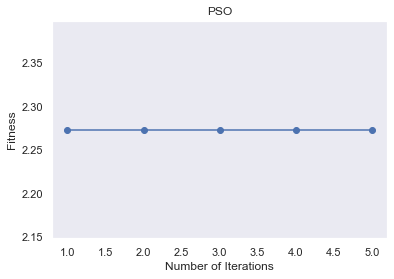

In [91]:
# perform feature selection
start_time = time.time()
fmdl  = jfs(fea_train, tar_train, opts)
print("Run Time --- %s seconds ---" % (time.time() - start_time))

sf    = fmdl['sf']

# model with selected features
num_train = np.size(xtrain, 0)
num_valid = np.size(xtest, 0)
x_train   = xtrain[:, sf]
y_train   = ytrain.reshape(num_train)  # Solve bug
x_valid   = xtest[:, sf]
y_valid   = ytest.reshape(num_valid)  # Solve bug

mdl       = LinearRegression()
mdl.fit(x_train, y_train)

# accuracy
y_pred    = mdl.predict(x_valid)
RMSE       = mean_squared_error(y_valid, y_pred, squared=False)
print("RMSE:", RMSE)

# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)

# plot convergence
curve   = fmdl['c']
curve   = curve.reshape(np.size(curve,1))
x       = np.arange(0, opts['T'], 1.0) + 1.0

fig, ax = plt.subplots()
ax.plot(x, curve, 'o-')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Fitness')
ax.set_title('PSO')
ax.grid()
plt.show()

In [92]:
#fmdl['sf']

In [55]:
fea_test1

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
459219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
459220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
459221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
fea_test

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,2.363750,1.916203,0.184541,2.440127,0.577874,0.000000,0.078897,0.588604,3.422562,0.000000,...,1.213547,0.283428,2.395486,1.414126,1.183683,1.049632,2.740034,1.363704,1.047454,0.846585
1,0.533977,0.924765,2.378201,3.085876,0.408034,1.561423,0.262287,0.439211,2.397899,0.000000,...,0.682672,0.927280,1.626070,1.644377,1.820377,1.867075,2.370739,0.699922,1.953716,1.376293
2,0.710139,1.807730,2.051916,2.701403,0.672705,1.210945,0.502603,0.168922,2.473247,0.000000,...,0.479059,0.404379,1.735982,1.623122,1.819362,2.150937,2.449273,0.803556,2.020212,0.888379
3,1.579053,1.377519,2.825317,2.279523,1.563736,0.477071,0.266360,0.633441,2.161402,2.060702,...,0.372520,0.677725,0.903594,2.190612,1.419063,3.370907,1.835370,0.860661,2.360836,1.615920
4,1.458075,0.653660,2.388275,3.107381,0.429360,0.872418,0.885285,0.258035,2.292130,0.000000,...,0.561990,1.003641,0.390563,1.723861,1.063376,1.939804,1.313687,0.718648,1.862935,1.776188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459218,1.469682,0.000000,2.647657,2.478929,0.987170,0.678623,0.000000,0.977993,2.372655,0.742785,...,0.645348,1.416873,0.741366,1.709117,1.100099,2.394512,1.494438,1.462142,1.663586,2.045068
459219,1.341614,0.565452,2.356685,2.526120,1.204384,0.824201,0.427434,0.972798,2.606099,0.661188,...,0.615922,1.355666,0.820901,1.742210,1.349560,2.520131,1.291004,1.414818,2.050128,1.803687
459220,0.571725,0.000000,2.490749,2.826693,0.783260,1.218140,0.000000,0.613919,1.778953,0.000000,...,0.230279,0.654082,0.803790,0.650566,1.350074,0.248968,1.544793,0.746572,0.688777,2.578455
459221,2.195108,0.173011,1.489014,2.024508,1.466583,0.268438,1.224378,1.524287,2.600744,1.180037,...,0.192946,2.155034,0.398918,1.705348,0.642886,3.273555,1.136577,1.056613,2.347438,1.851685


In [25]:
features1 = [1,  2,  3,  5,  6,  7,  8, 10, 11, 12, 13, 14, 16, 17, 19, 22, 23,
       24, 26, 27, 28, 29, 30, 31]

In [52]:
# Convert the NumPy array to a pandas DataFrame
fea_train = pd.DataFrame(fea_train)
fea_test = pd.DataFrame(fea_test)
fea_val = pd.DataFrame(fea_val)
#fea_val0 = pd.DataFrame(fea_val0)

NameError: name 'encoded_fea' is not defined

In [ ]:
fea_val

In [57]:
fea_train1= fea_train[features1]
fea_test1=fea_test[features1]
fea_val1=fea_val[features1]
#fea_val10=fea_val0[features]

In [59]:
fea_val1 = fea_val.iloc[:, features1].dropna()
fea_test1 = fea_test1.iloc[:, features1].dropna()

IndexError: positional indexers are out-of-bounds

In [60]:
fea_train1 = np.array(fea_train1)
fea_test1 = np.array(fea_test1)
fea_val1 = np.array(fea_val1)
#fea_val10 = np.array(fea_val10)

In [32]:
fea_val1.shape

(214304, 24)

In [33]:
fea_val1 = np.array(fea_val1)

In [61]:
fea_test1

array([[1.9162035 , 0.18454093, 2.4401274 , ..., 1.363704  , 1.0474542 ,
        0.8465853 ],
       [0.9247653 , 2.3782005 , 3.0858765 , ..., 0.6999216 , 1.953716  ,
        1.3762928 ],
       [1.8077298 , 2.0519156 , 2.7014027 , ..., 0.8035562 , 2.0202117 ,
        0.8883789 ],
       ...,
       [0.        , 2.4907494 , 2.8266926 , ..., 0.7465718 , 0.6887774 ,
        2.5784554 ],
       [0.1730113 , 1.4890136 , 2.0245075 , ..., 1.0566126 , 2.347438  ,
        1.8516847 ],
       [1.3716418 , 1.5853271 , 2.2521129 , ..., 1.4966226 , 1.6656451 ,
        0.7650902 ]], dtype=float32)

In [62]:
fea_test1

array([[1.9162035 , 0.18454093, 2.4401274 , ..., 1.363704  , 1.0474542 ,
        0.8465853 ],
       [0.9247653 , 2.3782005 , 3.0858765 , ..., 0.6999216 , 1.953716  ,
        1.3762928 ],
       [1.8077298 , 2.0519156 , 2.7014027 , ..., 0.8035562 , 2.0202117 ,
        0.8883789 ],
       ...,
       [0.        , 2.4907494 , 2.8266926 , ..., 0.7465718 , 0.6887774 ,
        2.5784554 ],
       [0.1730113 , 1.4890136 , 2.0245075 , ..., 1.0566126 , 2.347438  ,
        1.8516847 ],
       [1.3716418 , 1.5853271 , 2.2521129 , ..., 1.4966226 , 1.6656451 ,
        0.7650902 ]], dtype=float32)

In [146]:
# Separate the features and target
d = pd.read_csv('/Users/tharun/Desktop/NEW_Flask_app/data/X_val.csv')
fea = d.iloc[:, :-1]
tar = d.iloc[:, -1]
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the data in each column
fea = pd.DataFrame(scaler.fit_transform(fea), columns=fea.columns)
encoded_fea = encoder_2.predict(fea)
tar = np.squeeze(tar)

features1 = [1,  2,  3,  5,  6,  7,  8, 10, 11, 12, 13, 14, 16, 17, 19, 22, 23,
       24, 26, 27, 28, 29, 30, 31]

fea_val = pd.DataFrame(encoded_fea)
fea_val10 =fea_val[features1]
#fea_val10 = fea_val10.iloc[:, features1].dropna()
fea_val10 = np.array(fea_val10)

# Compute initial ensemble accuracy(validation_normal)
dt_pred_val1 = dt.predict(fea_val10)
lstm_pred_prob = model3.predict(fea_val10)
lstm_pred_val1 = np.argmax(lstm_pred_prob, axis=1)

weights=[0.96487615, 0.01706361]

ensemble_pred2 = np.average([dt_pred_val1, lstm_pred_val1], axis=0, weights=weights)
initial_score = np.mean(ensemble_pred2 == tar)
#print("Initial ensemble accuracy: {:.2f}%".format(initial_score*100))


y_pred_ensemble = np.array([np.argmax(np.bincount([dt_pred_val1[i], lstm_pred_val1[i]])) for i in range(len(dt_pred_val1))])

# calculate accuracy
accuracy = accuracy_score(y_pred_ensemble, tar)
acc1 = accuracy_score(dt_pred_val1,tar)
acc2 = accuracy_score(lstm_pred_val1,tar)
print(f"Accuracy-ensemble: {accuracy:.2f}")
# print(f"Accuracy-dt: {acc1:.2f}")
# print(f"Accuracy-lstm: {acc2:.2f}")

from sklearn.metrics import precision_score, recall_score

# assume y_true and y_pred are the true and predicted labels, respectively
# precision = precision_score(tar, y_pred_ensemble, average='weighted')
# prec1 = precision_score(tar, dt_pred_val1, average='weighted')
# prec2 = precision_score(tar, lstm_pred_val1, average='weighted')
# print('Precision-ensemble:', precision)
# print('Precision-dt:', prec1)
# print('Precision-lstm:', prec2)

# recall = recall_score(tar, y_pred_ensemble, average='weighted')
# recall1 = recall_score(tar, dt_pred_val1, average='weighted')
# recall2 = recall_score(tar, lstm_pred_val1, average='weighted')
# print('Recall-ensemble:', recall)
# print('Recall-dt:', recall1)
# print('Recall-lstm:', recall2)



cr = accuracy

from sklearn.metrics import f1_score, roc_auc_score, roc_curve

# assume y_true and y_pred are the true and predicted labels, respectively
# f_measure = f1_score(tar, y_pred_ensemble, average='weighted')
# f_measure1 = f1_score(tar, dt_pred_val1, average='weighted')
# f_measure2 = f1_score(tar, lstm_pred_val1, average='weighted')
# print('F-measure-ensemble:', f_measure)
# print('F-measure-dt:', f_measure1)
# print('F-measure-lstm:', f_measure2)

# print('Classification Rate', cr)

correct_indices = np.where(tar == y_pred_ensemble)[0]

print('Number of correct predictions:', len(correct_indices))
#print('Indices of correct predictions:', correct_indices)

# # assume y_pred is the predicted labels and class_label is the particular class label
# class_label = 2
# class_indices = np.where(y_pred_ensemble == class_label)[0]

# # create an empty array to store the indices
# indices_array = np.array([], dtype=int)

# # append the indices to the array
# indices_array = np.append(indices_array, class_indices)
# selected_indices = indices_array[:63]

# print('Number of instances predicted as class', class_label, ':', len(indices_array))
# print('Indices of instances predicted as class', class_label, ':', selected_indices)

from collections import Counter
count = Counter(y_pred_ensemble)

print(count)


count = Counter(dt_pred_val1)

print(count)


count = Counter(lstm_pred_val1)

print(count)


count = Counter(tar)

print(count)

print(d.shape)

6697/6697 [==============================] - 125s 19ms/step
Accuracy-ensemble: 0.75
Number of correct predictions: 160775
Counter({0: 170678, 2: 18675, 4: 16604, 1: 2946, 10: 2044, 5: 1785, 3: 1239, 6: 309, 11: 24})
Counter({0: 167889, 4: 19960, 2: 15523, 1: 2987, 5: 2429, 10: 2320, 3: 1558, 6: 1329, 7: 180, 12: 71, 11: 25, 14: 23, 9: 5, 13: 4, 8: 1})
Counter({0: 129489, 4: 30786, 10: 24850, 2: 24244, 3: 1420, 7: 911, 6: 883, 5: 757, 1: 578, 11: 386})
Counter({0: 136525, 4: 32346, 10: 22047, 2: 17809, 3: 1376, 7: 1195, 6: 825, 11: 816, 5: 760, 1: 293, 12: 214, 14: 83, 9: 7, 8: 4, 13: 4})
(214304, 79)


In [ ]:
acc1 = [0.95,0.33,0.98]
acc2 = [0.72,0.61,0.75]
acc3 = [0.73,0.68,0.75]
acc4 = [0.78,0.34,0.80]


In [151]:
from collections import Counter
count = Counter(dff[' Label'])

print(count)

Counter({0: 973097, 4: 231073, 10: 158930, 2: 128027, 3: 10293, 7: 7938, 11: 5897, 6: 5796, 5: 5499, 1: 1966, 12: 1507, 14: 652, 9: 36, 13: 21, 8: 11})


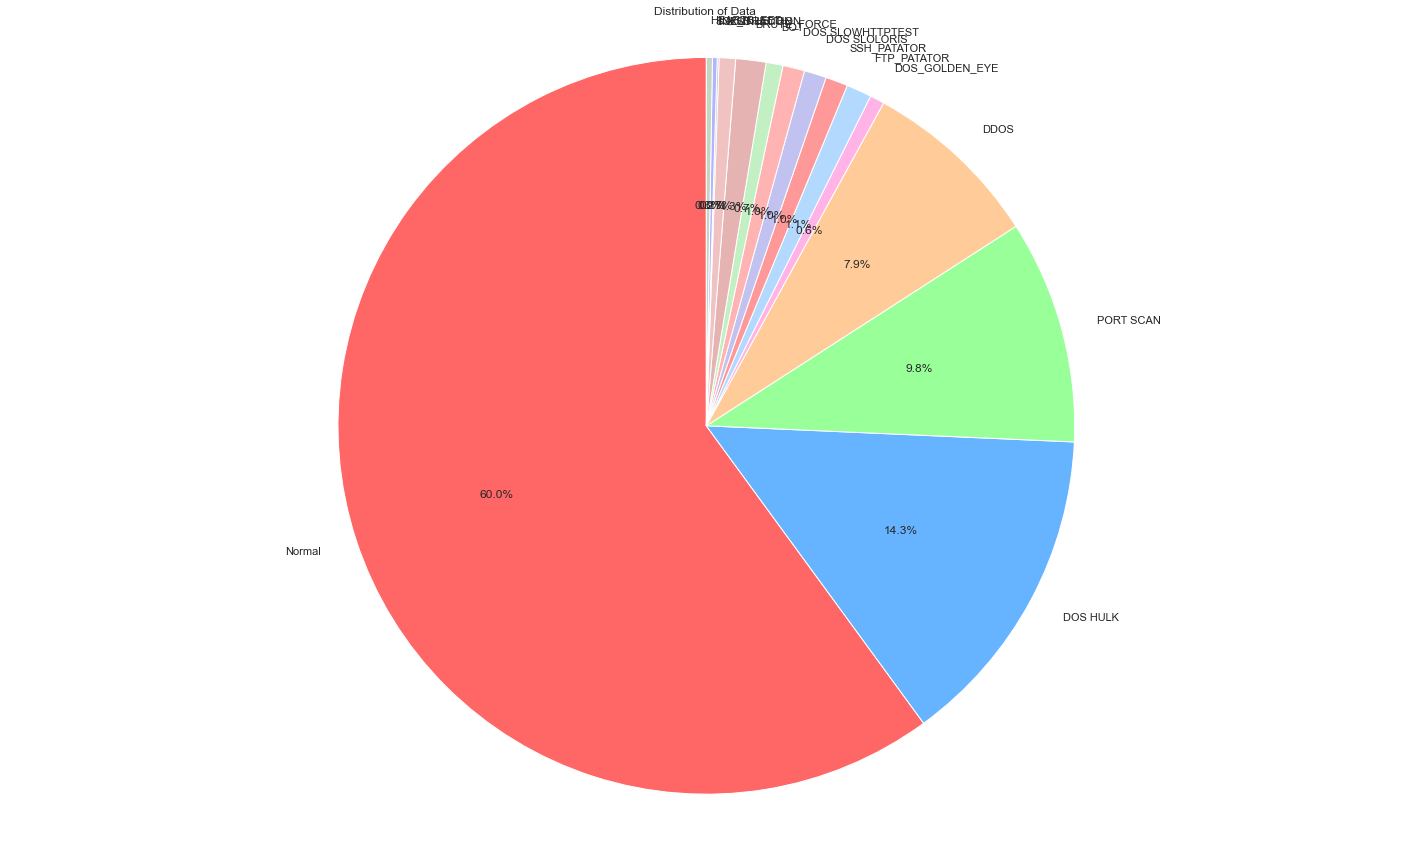

In [153]:
import matplotlib.pyplot as plt

# Define the data for the pie chart
labels = ['Normal', 'DOS HULK', 'PORT SCAN', 'DDOS', 'DOS_GOLDEN_EYE', 'FTP_PATATOR', 'SSH_PATATOR', 'DOS SLOLORIS', 'DOS SLOWHTTPTEST', 'BOT', 'BRUTE_FORCE', 'XSS', 'INFILTRATION', 'SQL_INJECTION', 'HEARTBLEED']
sizes = [973097, 231073, 158930, 128027, 10293, 17938, 15897, 15796, 15499, 11966, 21507, 11652, 1336, 3321, 4311]
colors = ['#ff6666', '#66b3ff', '#99ff99', '#ffcc99', '#ffb3e6', '#b3d9ff', '#ff9999', '#c2c2f0', '#ffb3b3', '#c2f0c2', '#e6b3b3', '#f0c2c2', '#c2c2d6', '#b3b3ff', '#c2d6c2']

# Set the figure size
fig = plt.figure(figsize=(25, 15))

# Plot the pie chart
ax = fig.add_subplot(1, 1, 1)
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

# Set the title of the chart
plt.title('Distribution of Data')

# Show the plot
plt.show()


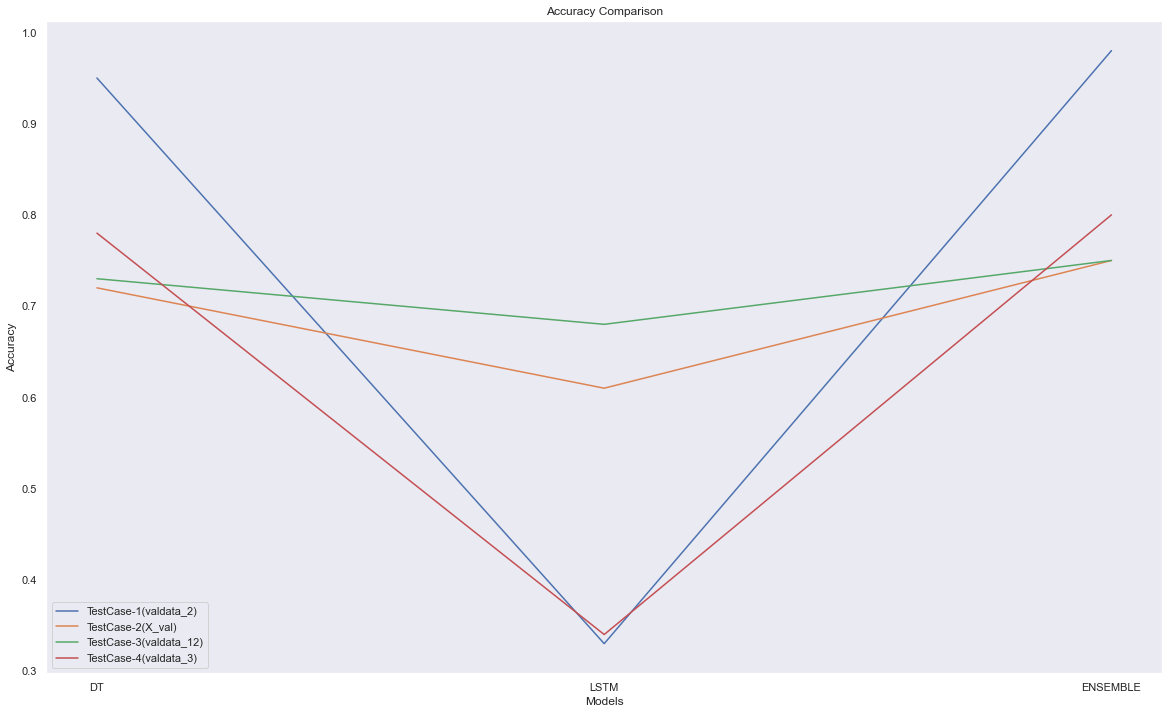

In [129]:
import matplotlib.pyplot as plt

# Define the data
x = ['DT', 'LSTM', 'ENSEMBLE']
acc1 = [0.95, 0.33, 0.98]
acc2 = [0.72, 0.61, 0.75]
acc3 = [0.73, 0.68, 0.75]
acc4 = [0.78, 0.34, 0.80]

# Set the figure size
plt.figure(figsize=(20,12))

# Plot the lines
plt.plot(x, acc1, label='TestCase-1(valdata_2)')
plt.plot(x, acc2, label='TestCase-2(X_val)')
plt.plot(x, acc3, label='TestCase-3(valdata_12)')
plt.plot(x, acc4, label='TestCase-4(valdata_3)')

# Add title and labels
plt.title('Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Add legend and grid
plt.legend()
plt.grid()

# Show the plot
plt.show()


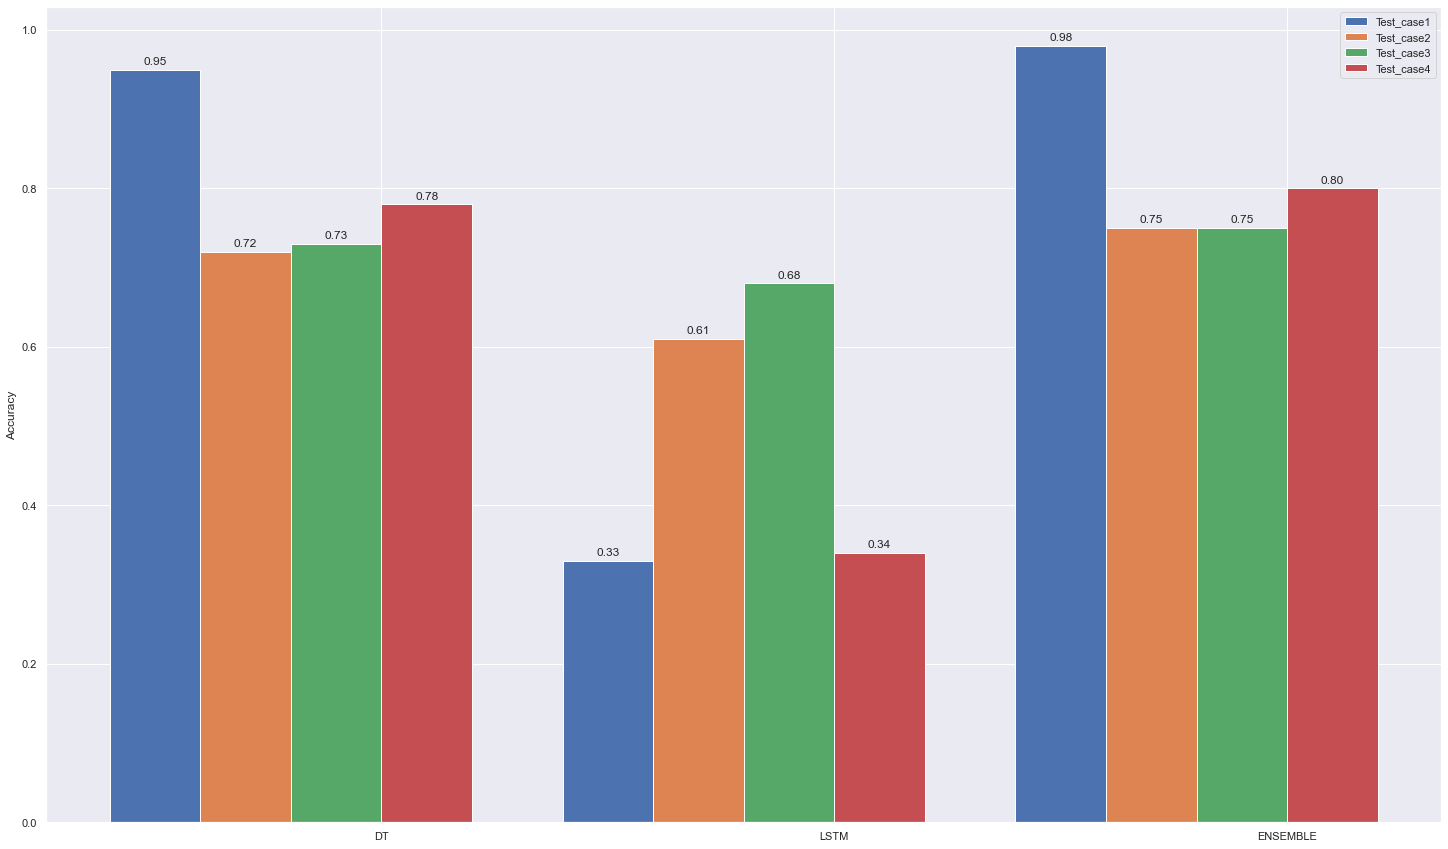

In [149]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data for the chart
x = np.arange(len(x))
width = 0.2
models = ['DT', 'LSTM', 'ENSEMBLE']

acc1 = [0.95, 0.33, 0.98]
acc2 = [0.72, 0.61, 0.75]
acc3 = [0.73, 0.68, 0.75]
acc4 = [0.78, 0.34, 0.80]

# Set the figure size
fig, ax = plt.subplots(figsize=(25, 15))

# Plot the bars for each model
rects1 = ax.bar(x - width/2, acc1, width, label='Test_case1')
rects2 = ax.bar(x + width/2, acc2, width, label='Test_case2')
rects3 = ax.bar(x + 3*width/2, acc3, width, label='Test_case3')
rects4 = ax.bar(x + 5*width/2, acc4, width, label='Test_case4')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xticks(x + 2*width)
ax.set_xticklabels(models)
ax.legend()

# Add value labels to the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# Show the plot
plt.show()


In [133]:
# create a new column in the DataFrame to store the modified labels
df_modified = d.copy()
df_modified['label_modified'] = df_modified[' Label']

# select the rows with the specified indices and modify the label column
df_modified.loc[selected_indices, 'label_modified'] = 0

print('Original DataFrame:')
print(d.head()) # print the first 5 rows of the original DataFrame

print('Modified DataFrame:')
print(df_modified.head()) # print the first 5 rows of the modified DataFrame

df_modified.to_csv('/Users/tharun/Desktop/NEW_Flask_app/datasets1/m1.csv', index=False)

Original DataFrame:
   Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
0        80         6        3567829             1             1   
1        80         6        3536033             2             2   
2        80         6        3537129             1             1   
3        80         6        3487595             1             1   
4        80         6        3576257             1             1   

   TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   Fwd Pkt Len Mean  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0                 0  ...                 0            0      

In [103]:
selected_indices.shape

(5000,)

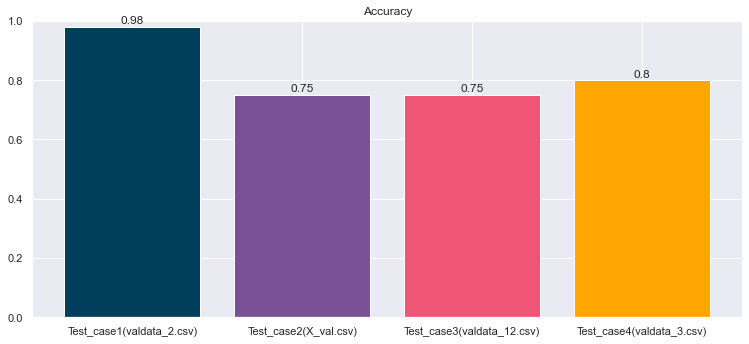

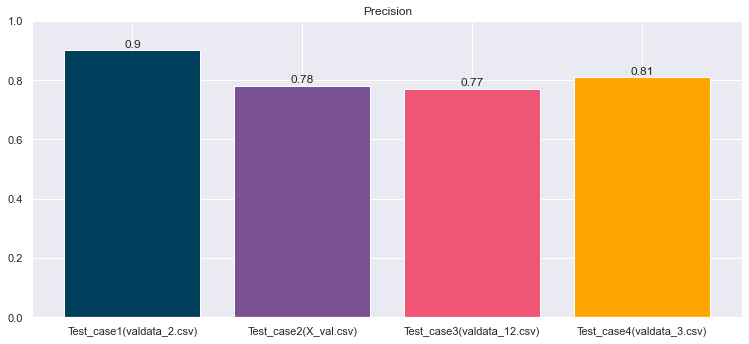

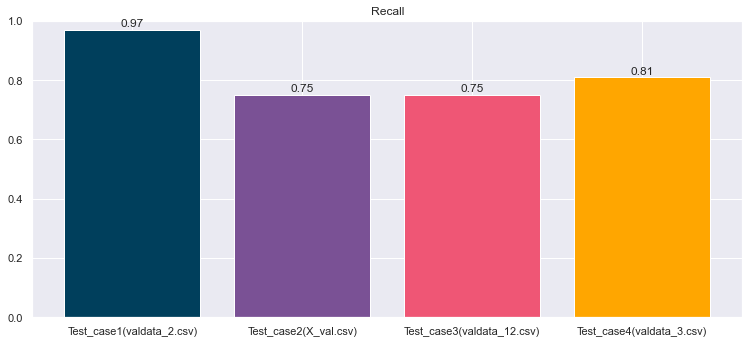

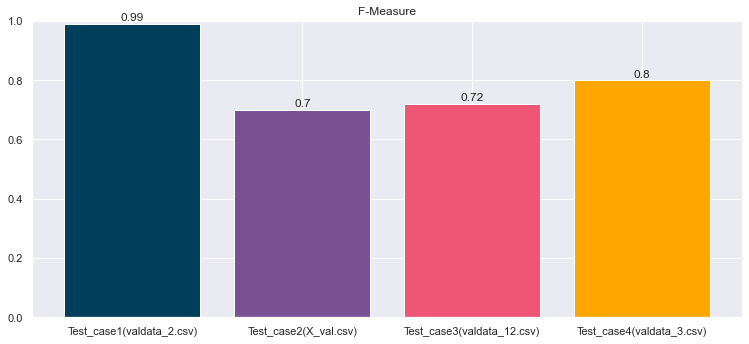

In [118]:
import matplotlib.pyplot as plt

# Define the data for the chart
models = ['Test_case1(valdata_2.csv)', 'Test_case2(X_val.csv)', 'Test_case3(valdata_12.csv)', 'Test_case4(valdata_3.csv)']
accuracies = [0.98, 0.75, 0.75, 0.80]
precisions = [0.9, 0.78, 0.77, 0.81]
recall = [0.97, 0.75, 0.75, 0.81]
f_measure = [0.99, 0.70, 0.72, 0.80]

# Set the figure size
fig = plt.figure(figsize=(28, 12))

# Plot the accuracy bar chart
ax1 = fig.add_subplot(2, 2, 1)
ax1.bar(models, accuracies, color=['#003f5c', '#7a5195', '#ef5675', '#ffa600'])
ax1.set_title('Accuracy')
ax1.set_ylim([0, 1])
for i, v in enumerate(accuracies):
    ax1.text(i, v+0.01, str(v), ha='center')

# Show the first plot
plt.show()

# Create a new figure for the precision chart
fig = plt.figure(figsize=(28, 12))

# Plot the precision bar chart
ax2 = fig.add_subplot(2, 2, 1)
ax2.bar(models, precisions, color=['#003f5c', '#7a5195', '#ef5675', '#ffa600'])
ax2.set_title('Precision')
ax2.set_ylim([0, 1])
for i, v in enumerate(precisions):
    ax2.text(i, v+0.01, str(v), ha='center')

# Show the second plot
plt.show()

# Create a new figure for the recall chart
fig = plt.figure(figsize=(28, 12))

# Plot the recall bar chart
ax3 = fig.add_subplot(2, 2, 1)
ax3.bar(models, recall, color=['#003f5c', '#7a5195', '#ef5675', '#ffa600'])
ax3.set_title('Recall')
ax3.set_ylim([0, 1])
for i, v in enumerate(recall):
    ax3.text(i, v+0.01, str(v), ha='center')

# Show the third plot
plt.show()

# Create a new figure for the f-measure chart
fig = plt.figure(figsize=(28, 12))

# Plot the f-measure bar chart
ax4 = fig.add_subplot(2, 2, 1)
ax4.bar(models, f_measure, color=['#003f5c', '#7a5195', '#ef5675', '#ffa600'])
ax4.set_title('F-Measure')
ax4.set_ylim([0, 1])
for i, v in enumerate(f_measure):
    ax4.text(i, v+0.01, str(v), ha='center')

# Show the fourth plot
plt.show()


In [71]:
fea_val10


array([[0.4518569 , 0.        , 1.2601587 , ..., 1.3037174 , 0.        ,
        0.5191252 ],
       [0.7140063 , 0.        , 2.004658  , ..., 1.5116144 , 0.        ,
        1.9213754 ],
       [0.45414647, 0.        , 1.2690912 , ..., 1.289133  , 0.        ,
        0.4966529 ],
       ...,
       [0.4512025 , 0.        , 1.2559859 , ..., 1.3116158 , 0.        ,
        0.53078675],
       [0.4516266 , 0.        , 1.2586837 , ..., 1.3065052 , 0.        ,
        0.5232417 ],
       [0.45261407, 0.        , 1.2647365 , ..., 1.2952634 , 0.        ,
        0.506553  ]], dtype=float32)

In [34]:
from keras.models import load_model
model3=load_model('/Users/tharun/Desktop/final-year-proj/Models/LSTM_final.h5')

In [35]:
import joblib
dt = joblib.load('/Users/tharun/Desktop/final-year-proj/Models/dt_model33.joblib')

In [63]:
# Compute initial ensemble accuracy
dt_pred1 = dt.predict(fea_test1)
lstm_pred_prob = model3.predict(fea_test1)
lstm_pred1 = np.argmax(lstm_pred_prob, axis=1)

14351/14351 [==============================] - 274s 19ms/step


In [56]:
# Compute initial ensemble accuracy(validation_normal)
dt_pred_val1 = dt.predict(fea_val1)
lstm_pred_prob = model3.predict(fea_val1)
lstm_pred_val1 = np.argmax(lstm_pred_prob, axis=1)

2048/2048 [==============================] - 36s 16ms/step


In [65]:
weights=[0.96487615, 0.01706361]

In [66]:
ensemble_pred1 = np.average([dt_pred1, lstm_pred1], axis=0, weights=weights)
initial_score = np.mean(ensemble_pred1 == tar_test)
print("Initial ensemble accuracy: {:.2f}%".format(initial_score*100))

Initial ensemble accuracy: 93.40%


In [58]:
ensemble_pred2 = np.average([dt_pred_val1, lstm_pred_val1], axis=0, weights=weights)
initial_score = np.mean(ensemble_pred2 == target)
print("Initial ensemble accuracy: {:.2f}%".format(initial_score*100))

Initial ensemble accuracy: 0.56%


In [60]:
ensemble_pred2

array([0.0695098, 0.0695098, 0.0695098, ..., 0.0695098, 0.0695098,
       0.0695098])

In [59]:
y_pred_ensemble = np.array([np.argmax(np.bincount([dt_pred1[i], lstm_pred1[i]])) for i in range(len(dt_pred1))])

NameError: name 'dt_pred1' is not defined

In [61]:
y_pred_ensemble = np.array([np.argmax(np.bincount([dt_pred_val1[i], lstm_pred_val1[i]])) for i in range(len(dt_pred_val1))])

In [63]:
correct_predictions = y_pred_ensemble == target
correct_indices = np.where(correct_predictions)[0]

In [64]:
from collections import Counter
count = Counter(y_pred_ensemble)

print(count)

Counter({0: 64074, 1: 1427, 2: 32, 4: 3})


In [130]:
from collections import Counter
count = Counter(tar)

print(count)

Counter({0: 32768})


In [65]:
# calculate accuracy
accuracy = accuracy_score(y_pred_ensemble, target)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.98
